# **Import Library yang dibutuhkan**

In [3]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [4]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Ruangguru_1.csv")
df.head()

,userName,score,at,content
0,TEGAR KBM DONG,1,2024-05-10 14:50:54,Pelajar yg mencari jawaban pertanyaan di persu...
1,Kar Sini,1,2024-05-10 10:06:20,Masa aku di telfon terus di suruh bayar 25jt g...
2,Arrafi Lucky,1,2024-05-10 07:26:52,Drill soalnya lemot
3,Marfen Setiabudi,1,2024-05-10 03:39:13,materi belajar terlalu bertele-tele
4,Ela Nurlaela,5,2024-05-10 00:18:02,Mantap


In [5]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Pelajar yg mencari jawaban pertanyaan di persu...,TEGAR KBM DONG,2024-05-10 14:50:54
1,Masa aku di telfon terus di suruh bayar 25jt g...,Kar Sini,2024-05-10 10:06:20
2,Drill soalnya lemot,Arrafi Lucky,2024-05-10 07:26:52
3,materi belajar terlalu bertele-tele,Marfen Setiabudi,2024-05-10 03:39:13
4,Mantap,Ela Nurlaela,2024-05-10 00:18:02
...,...,...,...
791,Ayo ke quipper,Muhammad Zainul Murod,2024-01-11 04:33:39
792,Ruang riung,Vynss Gitss,2024-01-11 01:28:26
793,Ruang Riung,Pes Bandung,2024-01-11 01:25:33
794,Aplikasi ini tidak bisa dibuka coba di lihat d...,Naira Nabila,2024-01-10 22:51:50


In [6]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   796 non-null    object
 1   userName  796 non-null    object
 2   at        796 non-null    object
dtypes: object(3)
memory usage: 18.8+ KB


In [7]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,796,796,796
unique,721,794,796
top,Bagus,Winnie Natasha,2024-05-10 14:50:54
freq,27,2,1


# **Cleaning Data & Case Folding**

In [8]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(796, 3)

In [9]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [10]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [11]:
# Menghapus data yang kosong
df = df.dropna()

In [12]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [13]:
df.shape

(721, 3)

In [14]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [15]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [16]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,pelajar yg mencari jawaban pertanyaan di persu...,TEGAR KBM DONG,2024-05-10 14:50:54
1,masa aku di telfon terus di suruh bayar jt gak...,Kar Sini,2024-05-10 10:06:20
2,drill soalnya lemot,Arrafi Lucky,2024-05-10 07:26:52
3,materi belajar terlalu berteletele,Marfen Setiabudi,2024-05-10 03:39:13
4,mantap,Ela Nurlaela,2024-05-10 00:18:02
...,...,...,...
791,ayo ke quipper,Muhammad Zainul Murod,2024-01-11 04:33:39
792,ruang riung,Vynss Gitss,2024-01-11 01:28:26
793,ruang riung,Pes Bandung,2024-01-11 01:25:33
794,aplikasi ini tidak bisa dibuka coba di lihat d...,Naira Nabila,2024-01-10 22:51:50


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [17]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,pelajar yang mencari jawaban pertanyaan di per...,TEGAR KBM DONG,2024-05-10 14:50:54
1,masa aku di telfon terus di suruh bayar jt tid...,Kar Sini,2024-05-10 10:06:20
2,drill soalnya lemot,Arrafi Lucky,2024-05-10 07:26:52
3,materi belajar terlalu berteletele,Marfen Setiabudi,2024-05-10 03:39:13
4,mantap,Ela Nurlaela,2024-05-10 00:18:02
...,...,...,...
791,ayo ke quipper,Muhammad Zainul Murod,2024-01-11 04:33:39
792,ruang riung,Vynss Gitss,2024-01-11 01:28:26
793,ruang riung,Pes Bandung,2024-01-11 01:25:33
794,aplikasi ini tidak bisa dibuka coba di lihat d...,Naira Nabila,2024-01-10 22:51:50


In [18]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [19]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,pelajar mencari jawaban pertanyaan persulit gi...,TEGAR KBM DONG,2024-05-10 14:50:54
1,masa aku telfon terus suruh bayar jt manuk aka...,Kar Sini,2024-05-10 10:06:20
2,drill soalnya lemot,Arrafi Lucky,2024-05-10 07:26:52
3,materi belajar terlalu berteletele,Marfen Setiabudi,2024-05-10 03:39:13
4,mantap,Ela Nurlaela,2024-05-10 00:18:02
...,...,...,...
791,ayo quipper,Muhammad Zainul Murod,2024-01-11 04:33:39
792,ruang riung,Vynss Gitss,2024-01-11 01:28:26
793,ruang riung,Pes Bandung,2024-01-11 01:25:33
794,aplikasi tidak dibuka coba lihat dulu mungkin ...,Naira Nabila,2024-01-10 22:51:50


In [20]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [pelajar, mencari, jawaban, pertanyaan, persul...
1      [masa, aku, telfon, terus, suruh, bayar, jt, m...
2                                [drill, soalnya, lemot]
3                [materi, belajar, terlalu, berteletele]
4                                               [mantap]
                             ...                        
791                                       [ayo, quipper]
792                                       [ruang, riung]
793                                       [ruang, riung]
794    [aplikasi, tidak, dibuka, coba, lihat, dulu, m...
795                       [wow, aplikasi, sangat, bagus]
Name: content, Length: 721, dtype: object

In [21]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Ruangguru_1.csv', index = False)


In [22]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Ruangguru_1.csv', encoding = 'latin1')
df_clean

,content
0,ajar cari jawab tanya sulit gimana cara ajar b...
1,masa aku telfon terus suruh bayar jt manuk aka...
2,drill soal lot
3,materi ajar terlalu berteletele
4,mantap
...,...
716,ayo quipper
717,ruang riung
718,ruang riung
719,aplikasi tidak buka coba lihat dulu mungkin ya...


# **Translate**

In [23]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [24]:
# import pandas as pd
# from easynmt import EasyNMT

In [25]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Ruangguru_1.csv', encoding='latin1')

In [26]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [27]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [28]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [29]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Ruangguru_1.csv')

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Ruangguru_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,ajar cari jawab tanya sulit gimana cara ajar b...,"fontcolor="" # FFFF00""eachingansight fontcolor=..."
1,1,masa aku telfon terus suruh bayar jt manuk aka...,"When I call, you keep telling me to pay."
2,2,drill soal lot,drill about lot
3,3,materi ajar terlalu berteletele,The teaching material is too beat-up.
4,4,mantap,Steady.
...,...,...,...
716,716,ayo quipper,"Come on, quipper."
717,717,ruang riung,rifling space
718,718,ruang riung,rifling space
719,719,aplikasi tidak buka coba lihat dulu mungkin ya...,The application does not open. Check it out fi...


# **Labeling**

In [31]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Ruangguru_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,ajar cari jawab tanya sulit gimana cara ajar b...,"fontcolor="" # FFFF00""eachingansight fontcolor=..."
1,1,masa aku telfon terus suruh bayar jt manuk aka...,"When I call, you keep telling me to pay."
2,2,drill soal lot,drill about lot
3,3,materi ajar terlalu berteletele,The teaching material is too beat-up.
4,4,mantap,Steady.
...,...,...,...
716,716,ayo quipper,"Come on, quipper."
717,717,ruang riung,rifling space
718,718,ruang riung,rifling space
719,719,aplikasi tidak buka coba lihat dulu mungkin ya...,The application does not open. Check it out fi...


In [32]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [33]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 435
Netral = 218
Negatif = 68

Total Data Seluruhnya : 721


In [35]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,ajar cari jawab tanya sulit gimana cara ajar b...,"fontcolor="" # FFFF00""eachingansight fontcolor=...",Positif
1,1,masa aku telfon terus suruh bayar jt manuk aka...,"When I call, you keep telling me to pay.",Netral
2,2,drill soal lot,drill about lot,Netral
3,3,materi ajar terlalu berteletele,The teaching material is too beat-up.,Netral
4,4,mantap,Steady.,Positif
...,...,...,...,...
716,716,ayo quipper,"Come on, quipper.",Netral
717,717,ruang riung,rifling space,Netral
718,718,ruang riung,rifling space,Netral
719,719,aplikasi tidak buka coba lihat dulu mungkin ya...,The application does not open. Check it out fi...,Negatif


In [36]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,ajar cari jawab tanya sulit gimana cara ajar b...,"fontcolor="" # FFFF00""eachingansight fontcolor=...",Positif
1,masa aku telfon terus suruh bayar jt manuk aka...,"When I call, you keep telling me to pay.",Netral
2,drill soal lot,drill about lot,Netral
3,materi ajar terlalu berteletele,The teaching material is too beat-up.,Netral
4,mantap,Steady.,Positif
...,...,...,...
716,ayo quipper,"Come on, quipper.",Netral
717,ruang riung,rifling space,Netral
718,ruang riung,rifling space,Netral
719,aplikasi tidak buka coba lihat dulu mungkin ya...,The application does not open. Check it out fi...,Negatif


# **Visualisasi**


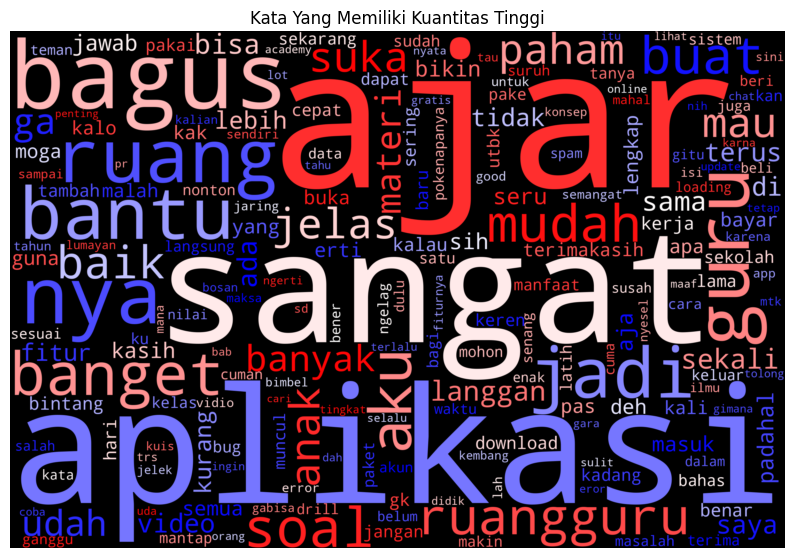

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


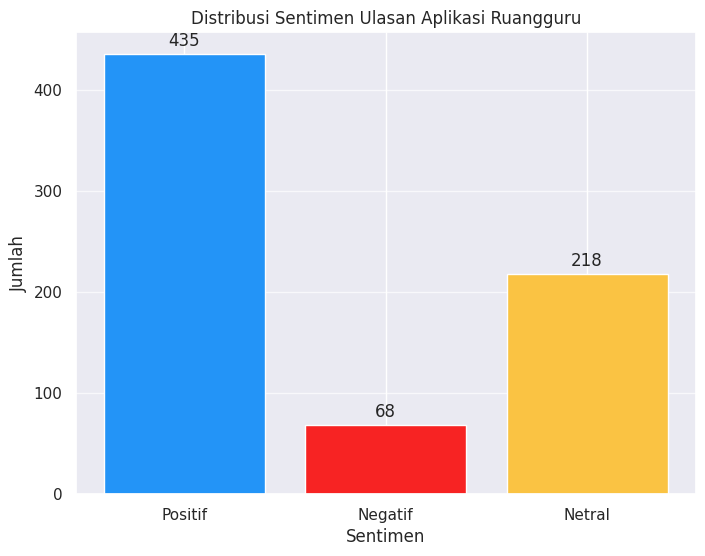

In [38]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Ruangguru")


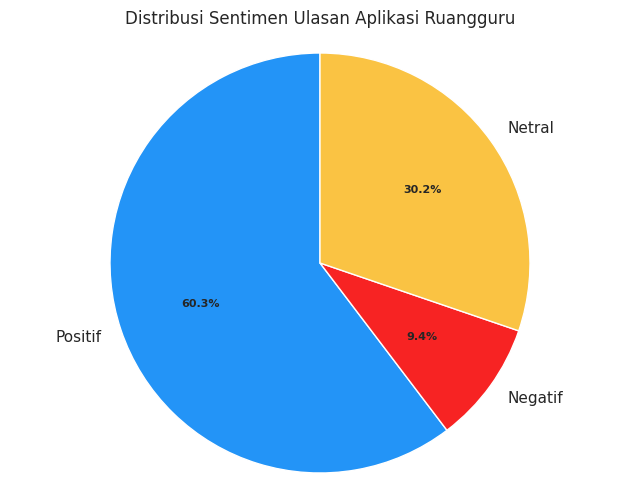

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Ruangguru")

In [40]:
data = data.replace({'Positif':0, 'Netral':1, 'Negatif':2})
data

,content,content_en,sentimen
0,ajar cari jawab tanya sulit gimana cara ajar b...,"fontcolor="" # FFFF00""eachingansight fontcolor=...",0
1,masa aku telfon terus suruh bayar jt manuk aka...,"When I call, you keep telling me to pay.",1
2,drill soal lot,drill about lot,1
3,materi ajar terlalu berteletele,The teaching material is too beat-up.,1
4,mantap,Steady.,0
...,...,...,...
716,ayo quipper,"Come on, quipper.",1
717,ruang riung,rifling space,1
718,ruang riung,rifling space,1
719,aplikasi tidak buka coba lihat dulu mungkin ya...,The application does not open. Check it out fi...,2


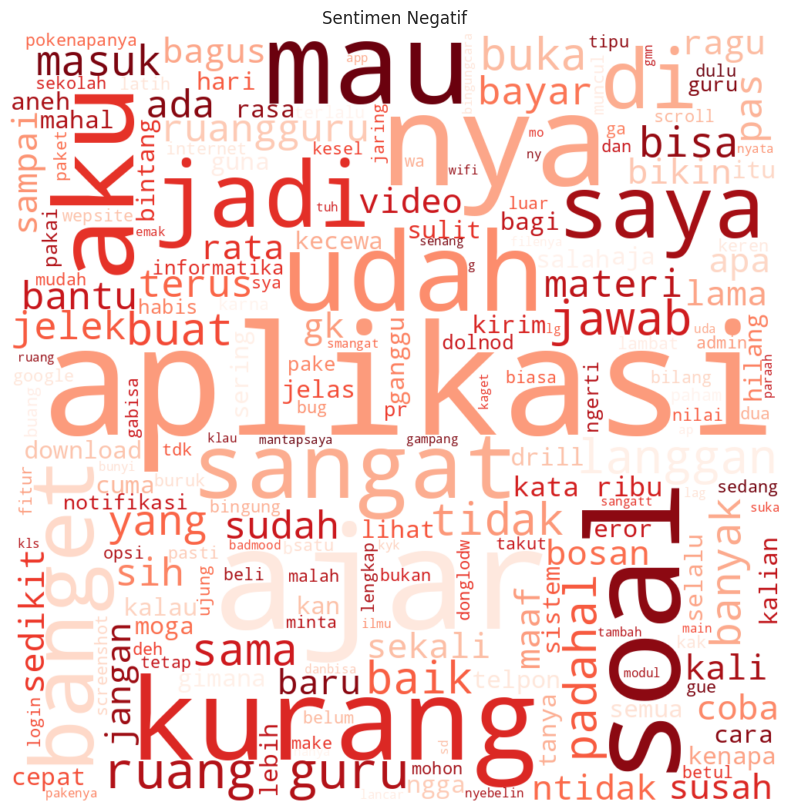

In [41]:
# Visualisasi Wordcould Positif, Negatif, dan Netral

data_positif = data[data['sentimen'] == 0]
data_netral = data[data['sentimen'] == 1]
data_negatif = data[data['sentimen'] == 2]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

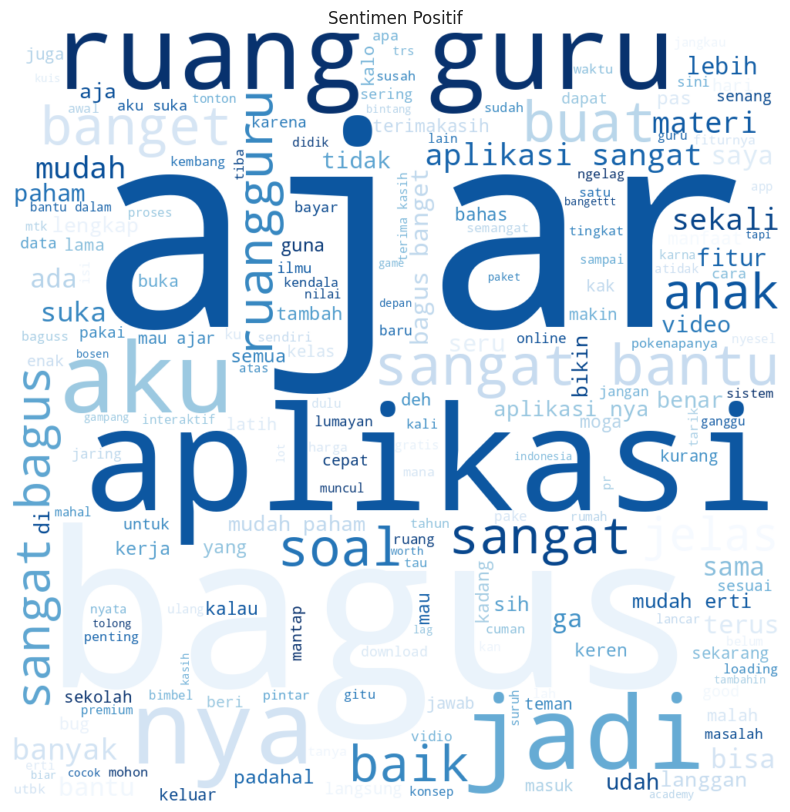

In [42]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

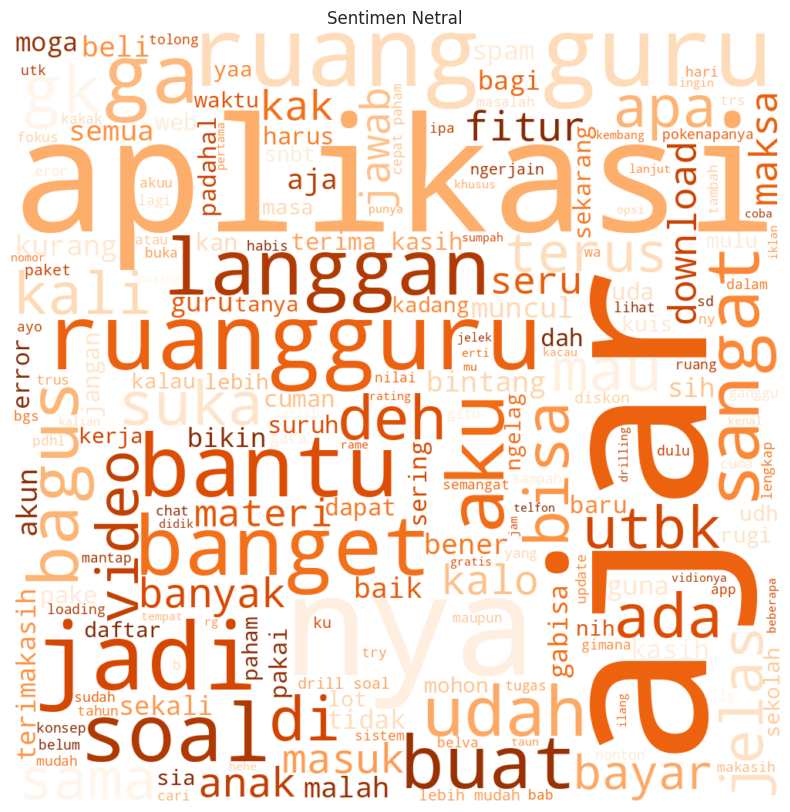

In [43]:
all_words = ' '.join([reviews for reviews in data_netral['content']])
wordcloud = WordCloud(colormap='Oranges', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Netral")
plt.margins(x=0, y=0)
plt.show()

In [44]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
0    435
1    218
2     68
Name: count, dtype: int64

# **Data Preparation**

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [46]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [64]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((576,), (145,))

In [68]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [77]:
# Run SVM with default hyperparameters
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC()

svc.fit(X_train_vec,y_train)
y_pred=svc.predict(X_test_vec)

print('Model accuracy score with default hyperparameters : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters : 0.6069


In [79]:
# Run SVM with rbf kernel and C=100.0

svc=SVC(C=100.0)

svc.fit(X_train_vec,y_train)
y_pred=svc.predict(X_test_vec)

print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



Model accuracy score with rbf kernel and C=100.0 : 0.6483


In [80]:
# Run SVM with rbf kernel and C=1000.0

svc=SVC(C=1000.0)

svc.fit(X_train_vec,y_train)
y_pred=svc.predict(X_test_vec)

print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



Model accuracy score with rbf kernel and C=1000.0 : 0.6483


In [85]:
# Run SVM with linear kernel and C=1.0

linear_svc=SVC(kernel='linear', C=1.0)

linear_svc.fit(X_train_vec,y_train)
y_pred_test=linear_svc.predict(X_test_vec)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.6414


In [84]:
# Run SVM with linear kernel and C=100.0

linear_svc=SVC(kernel='linear', C=100.0)

linear_svc.fit(X_train_vec,y_train)
y_pred_test=linear_svc.predict(X_test_vec)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=100.0 : 0.6345


In [86]:
# Run SVM with linear kernel and C=1000.0

linear_svc=SVC(kernel='linear', C=1000.0)

linear_svc.fit(X_train_vec,y_train)
y_pred_test=linear_svc.predict(X_test_vec)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1000.0 : 0.6345


In [88]:
y_pred_train = linear_svc.predict(X_train_vec)

y_pred_train

array([0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1,
       1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [89]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [91]:
# Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(linear_svc.score(X_train_vec, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test_vec, y_test)))



Training set score: 1.0000
Test set score: 0.6345


In [92]:
y_test.value_counts()

sentimen
0    76
1    50
2    19
Name: count, dtype: int64

In [94]:
# Run SVM with polynomial kernel and C=1.0

linear_svc=SVC(kernel='poly', C=1.0)

linear_svc.fit(X_train_vec,y_train)
y_pred_test=linear_svc.predict(X_test_vec)


# compute and print accuracy score
print('Model accuracy score with linear polynomial and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear polynomial and C=1.0 : 0.5310


In [95]:
# Run SVM with polynomial kernel and C=100.0

linear_svc=SVC(kernel='poly', C=100.0)

linear_svc.fit(X_train_vec,y_train)
y_pred_test=linear_svc.predict(X_test_vec)


# compute and print accuracy score
print('Model accuracy score with linear polynomial and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear polynomial and C=100.0 : 0.6483


In [98]:
# Run SVM with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)


# fit classifier to training set
sigmoid_svc.fit(X_train_vec,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test_vec)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.6069


In [97]:
# Run SVM with sigmoid kernel and C=100.0
sigmoid_svc=SVC(kernel='sigmoid', C=100.0)


# fit classifier to training set
sigmoid_svc.fit(X_train_vec,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test_vec)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.6069


In [101]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[66  9  1]
 [24 25  1]
 [ 9  7  3]]

Accuracy =  0.6482758620689655


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

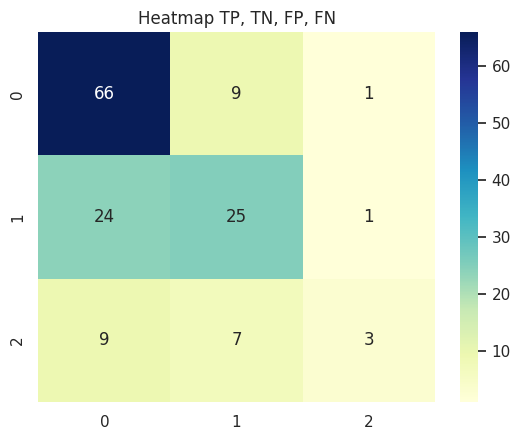

In [102]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1', '2'],
                         index=['0', '1', '2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [103]:
# Slicing the confusion matrix
print('\nTrue Positives (TP):', cm[0, 0])
print('False Negatives (FN) for Positive class:', cm[0, 1] + cm[0, 2])
print('False Positives (FP) for Positive class:', cm[1, 0] + cm[2, 0])
print('True Negatives (TN) for Negative class:', cm[1, 1])
print('False Negatives (FN) for Negative class:', cm[1, 2])
print('False Positives (FP) for Negative class:', cm[2, 1])
print('True Negatives (TN) for Neutral class:', cm[2, 2])


True Positives (TP): 66
False Negatives (FN) for Positive class: 10
False Positives (FP) for Positive class: 33
True Negatives (TN) for Negative class: 25
False Negatives (FN) for Negative class: 1
False Positives (FP) for Negative class: 7
True Negatives (TN) for Neutral class: 3


In [104]:
tp = cm[0, 0]
fn_pos = cm[0, 1] + cm[0, 2]
fp_pos = cm[1, 0] + cm[2, 0]
tn_neg = cm[1, 1]
fn_neg = cm[1, 2]
fp_neg = cm[2, 1]
tn_neu = cm[2, 2]

In [105]:
total = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
correct = tp + tn_neg + tn_neu

In [106]:
# Calculate classification Accuracy
total = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
correct = tp + tn_neg + tn_neu

classification_accuracy = correct / total
print(f'\nClassification Accuracy: {classification_accuracy:.4f}')


Classification Accuracy: 0.6483


In [107]:
# Calculate Classification Error
total_instances = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
misclassified_instances = fn_pos + fp_pos + fn_neg + fp_neg

classification_error = misclassified_instances / total_instances
print(f'\nClassification Error: {classification_error:.4f}')


Classification Error: 0.3517


# **Testing**


In [109]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svc.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
else:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : jelek, ngga berguna
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [111]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svc.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
else:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus, membantu anak belajar
Hasil Analisis Sentimen Untuk Teks Baru : Positif


In [116]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svc.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
else:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : kadang suka error
Hasil Analisis Sentimen Untuk Teks Baru : Netral
